# Week 9: Fourier Transforms

Name: Manav Bilakhia

Date: 01/11/2022

## Library Imports go here

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from scipy.sparse import coo_matrix, linalg, identity
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import find_peaks 

## A Basic Fourier Transform Function

### The Code

<font color = blue>
Construct a function that will implement the basic Fourier transform of a discrete data set:

$$
P_k = \sum_{j = 0}^{N-1} p_je^{2\pi ijk/N}, \hspace{.75in} k = 0, 1, 2, \dots, N-1
$$

Your function should take as input a list of discrete values $[p_0, p_1, \dots, p_{N-1}]$ and a time step $\Delta t$.  It should output both a list of frequencies $[f_k]$ and a list of transform values $[P_k]$, where the frequency is given by

$$
f_k = \left\{\begin{array}{rcl} k\Delta f = \frac{k}{N\Delta t} & \mbox{for} & k = 0, 1, 2, \dots, \frac{N}{2} \\ \\ -(N-k)\Delta f = \frac{k - N}{N\Delta t} & \mbox{for} & k = \frac{N}{2} + 1, \dots, N-1 \end{array}\right.
$$

This assumes $N$ is an even integer.  If the input list has an odd number of elements, have your code simply discard the last element of the input.

In [2]:
def fourier_transform(data_points, delta_t):
    N = len(data_points) #gets the length of the list of points
    if (N%2 != 0): #check if the length is not even
        data_points = data_points[:-1] #remove the last elememt
        N = N-1 #decrease the length of the list
    t_max = N*delta_t       #calculating t_max
    f_max = 1/(2*delta_t)   #calculating f_max
    delta_f = 1/t_max       #calculating delta_f
    frequency_list = np.zeros(N)# declaring a list of 0
    p_list = np.array([0.0+0.1j for i in range(N)])#declaring a complex list of 0.1i
    for k in range (N):#outer loop
        p_k = 0 #setting the initial sum to be zero for each iteration
        for j in range (N):#inner loop
            p_k += (data_points[j]*np.exp((2*np.pi*1j*j*k)/N)) #getting a fourier transformed value
        p_list[k] = p_k #saving the value in the list
        if k <=N/2: #checking if we are going thrugh the first half of the list
            frequency = k*delta_f #calculating the frequency
        else:
            frequency = -(N-k)*delta_f#calculating the frequency for the second half
        frequency_list[k] = frequency#saving the frequency value in the list    
    return p_list, frequency_list

Here we have two outputs 1) the fourier transform ad 2) frequency list.

### A Simple Test

<font color = blue>
To test out your function, use

$$
p(t) = \cos 40\pi t
$$

.

Start by creating a list of discrete values from this function, working with the time interval $[0, 10]$, and the time step $\Delta t = 0.01$.  Input this into your Fourier function, and plot the results.

Confirm that the peaks of the Fourier transform appear where they should.  What sets the height of the peaks?  Are they correct?

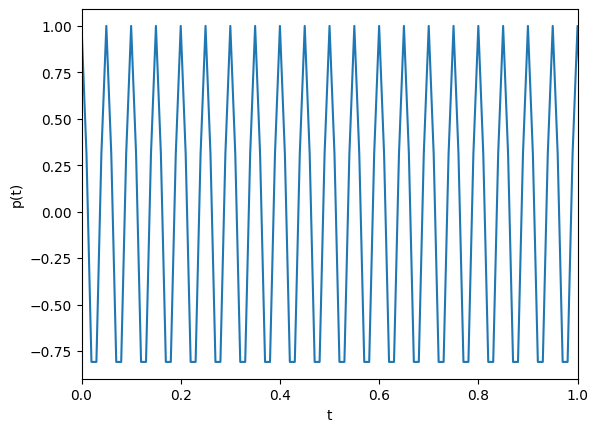

C:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


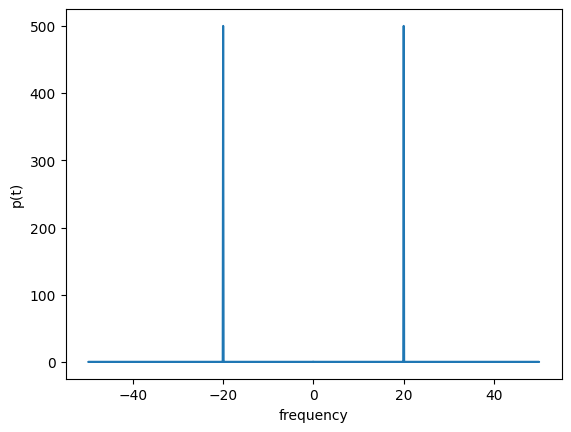

In [3]:
t_vals = np.arange(0,10,0.01)#getting the input values for the function
discrete_list = np.array([np.cos(40*np.pi*t) for t in t_vals])#saving the output of the mathematical function
plt.plot(t_vals, discrete_list)#plotting the mathematical function
plt.xlim(0,1) #limitting the x range
plt.xlabel("t")   #xlabel
plt.ylabel("p(t)")#ylabel
plt.show()

p_list, frequency_list = fourier_transform(discrete_list, 0.01)#fourier transforming the output of the mathematical functions
plt.plot(frequency_list, p_list) #plotting the fourier transformed output along with the frequency
plt.xlabel("frequency")#xlabel
plt.ylabel("p(t)")#ylabel
plt.show()


We see that the amplitude of the 2 peaks is 500 which is perfect as the value of A*N/2 = 500 where A = 1 and N = 1000 We see two peaks here at -20Hz and 20Hz. The position of the frequencies also work out perfectly as $\cos 40\pi t$ can also be written as  $\cos 20 \times 20\pi t$ as $20\pi t$ = $\pi t$. Both the position and the amplitude of the peaks are what we expected them to be.  

### Timing

<font color = blue>
The Fourier transform function as we have created it should require a time to compute that grows *quadratically* with $N$.  Why is that? Construct a function that takes as input the value $N$ and outputs the time required to find the Fourier transform of the function $p(t) = \cos 40\pi t$ on the interval $[0, 10]$, with $\Delta t = \frac{T}{N}$.  Use this function to create lists of the form $[N]$ and $[T_N]$, for $N = 50, 100, 150, 200, \dots, 1000$.  Confirm the quadratic behavior.

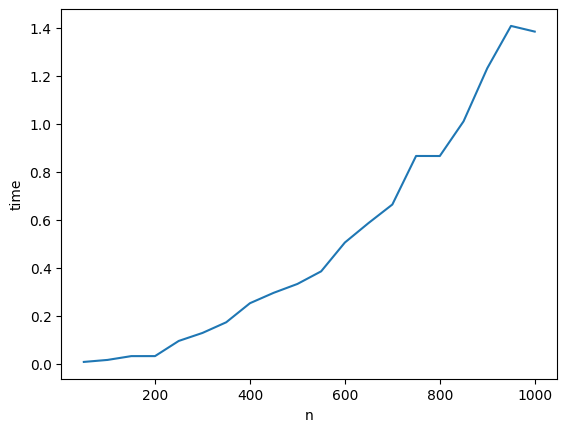

In [4]:
def timing(N): #function examins the time complexity of the algorithm
    delta_t = 10/N #calculating the value of delta t
    t_vals = np.linspace(0,10,int(N)+1) # getting the values of for the mathematical function
    discrete_list = np.array([np.cos(40*np.pi*t) for t in t_vals]) #making the discreet list from the output of the mathematical function
    start_time = time.time() #starting the timer
    p_list, frequency_list = fourier_transform(discrete_list, delta_t) #doing the fourier transform
    end_time = time.time() #shutting the timer
    return end_time - start_time #getting the elapsed time
n_vals = np.linspace(50, 1000, 20) #making a list of N values
time_vals = np.array([timing(N) for N in n_vals]) #getting the time output for each N val from the timing function
plt.plot(n_vals, time_vals) #plotting
plt.xlabel("n") #xlabel
plt.ylabel("time") # ylabel
plt.show()


Here the time complexity of this algorithm is O($n^2$) which is reaffirmed by the quadratic behavior of the curve and the fact that the algorithm has nested looping structure.

## * Another Look at the Relativistic Harmonic Oscillator

<font color = blue>
The fact that the relativistic harmonic oscillator has sinusoidal oscillations for small amplitudes, but roughly triangular oscillations for large amplitudes makes it particularly interesting to examine using a Fourier transform.  Recall that the relativistic oscillator satisfies the differential equation (after appropriate non-dimensionalization)

$$
\ddot{x} = -x(1 - \dot{x}^2)^{3/2}
$$

Use either RK4 or Verlet (as you did originally) to generate solutions to this equation, with 1000 time steps of size $\Delta t = 0.1$, where the object is released from rest with initial positions {0.1, 0.5, 1.0, and 5.0}.  Take the Fourier transform of each solution, and create a separate plot of the power spectrum for each solution.  (It may be best to use a logarithmic scale so as to see peaks of very different sizes clearly.)  Spend some time augmenting the plots: for the smaller amplitude cases show where the non-relativistic frequency peaks would be, and what heights they would be.  For the larger amplitude cases (where comparison with the SHO is less useful), label where the peaks actually are.  Discuss the results.

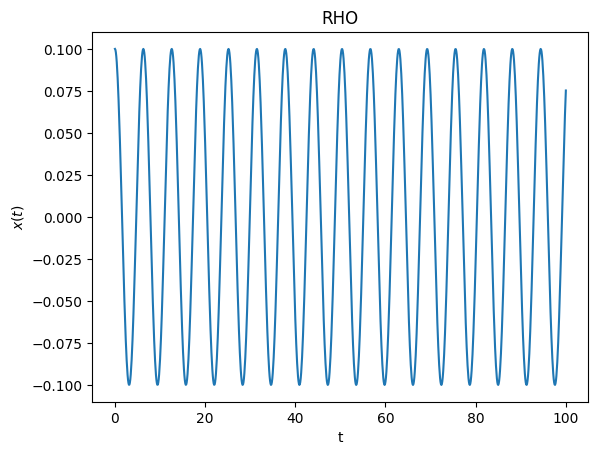

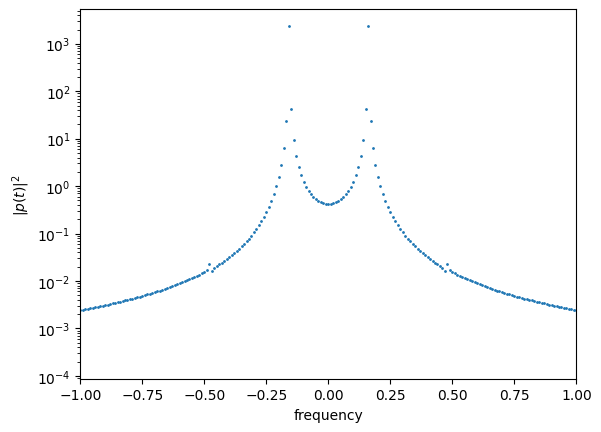

{'peak_heights': array([2380.43175943, 2380.43175943])}


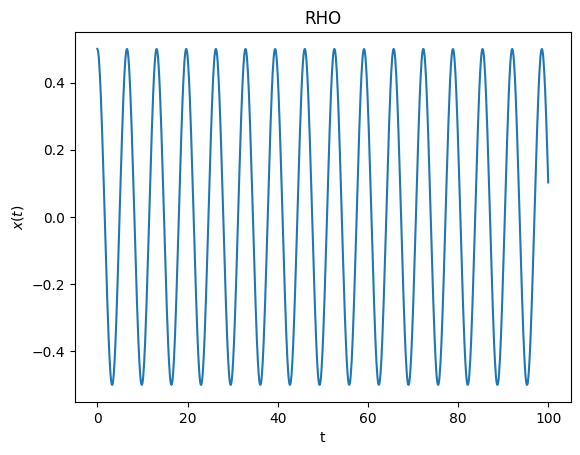

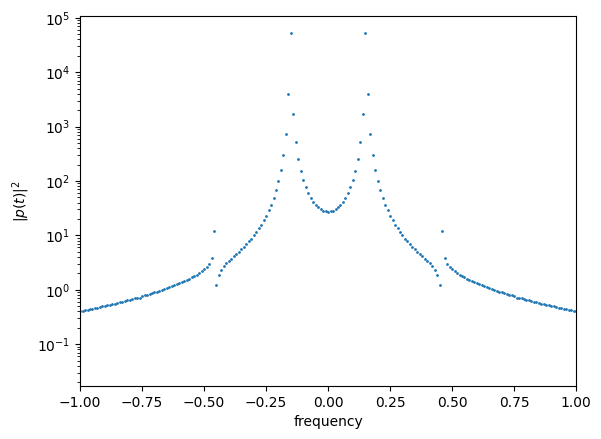

{'peak_heights': array([52555.97645193, 52555.97645193])}


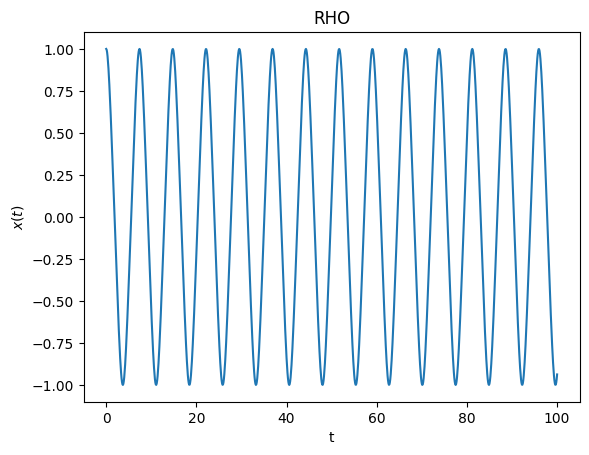

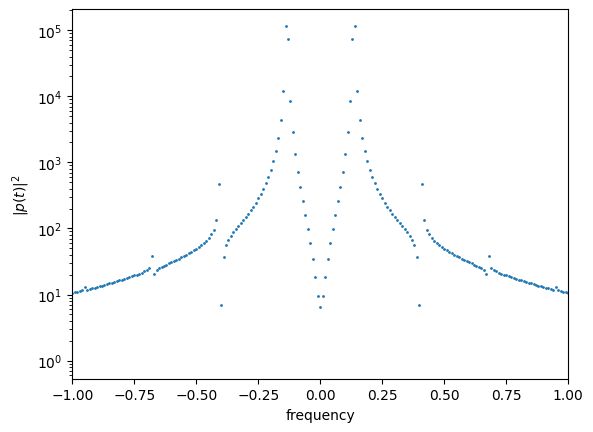

{'peak_heights': array([116147.69405692,    469.56358235,    469.56358235, 116147.6940569 ])}


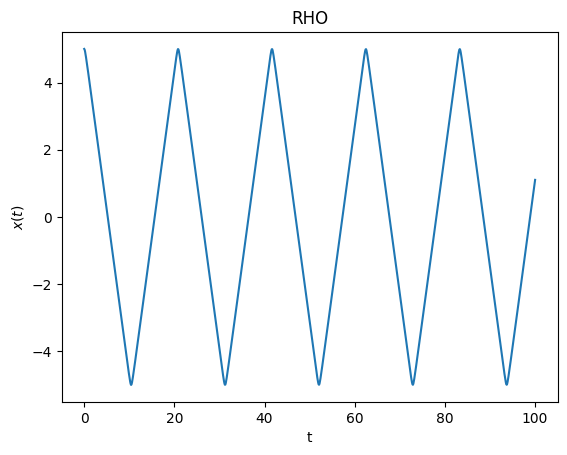

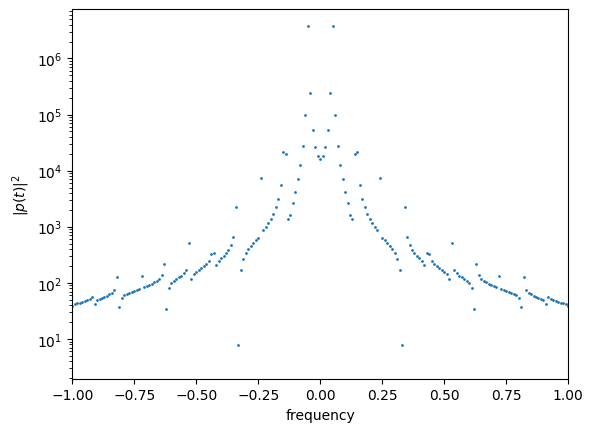

{'peak_heights': array([3.80695149e+06, 2.16637225e+04, 7.38419135e+03, 2.22244129e+03,
       3.39822521e+02, 5.11539997e+02, 2.16283300e+02, 1.34167189e+02,
       1.28248860e+02, 1.28248860e+02, 1.34167189e+02, 2.16283300e+02,
       5.11539997e+02, 3.39822521e+02, 2.22244129e+03, 7.38419135e+03,
       2.16637225e+04, 3.80695149e+06])}


In [5]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0]) #part of the initial condition
    x_n = np.array([x0]) #part of the initial condition
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n = np.append(t_n, t) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n = np.append(x_n,np.array([x]),axis = 0) #storing x values in an array and making sure the shape is consistent
    return x_n, t_n #returning the arrays

def rho(x_n, t):#  mathematical function for the RHO that is input for the RK4
    return np.array([x_n[1],-x_n[0]*(1-x_n[1]**2)**(3/2)])

initial_conditions = [0.1, 0.5, 1.0, 5.0]#list of initial conditions


for condition in initial_conditions: #looping over initial conditions
    x_list, t_list = Rk4(rho, [condition, 0], 0.1, 1000) #getting position vals from RK4
    x_vals4 = np.array([x_list[i][0]for i in range (len (x_list))])#unpackingn them
    plt.plot(t_list, x_vals4)#plotting
    plt.title("RHO")
    plt.xlabel("t") #xlabel
    plt.ylabel("$x(t)$") #ylabel
    plt.show()
    p_list, frequency_list = fourier_transform(x_vals4, 0.1)#fourier transforming them
    plt.scatter(frequency_list, abs(p_list)**2, s = 1) #plotting the |P|^2
    plt.xlabel("frequency") #xlabel
    plt.ylabel("$|p(t)|^2$") #ylabel
    plt.xlim(-1, 1) #xrange
    plt.yscale("log") #scaling on the y-axis
    plt.show()
    peaks = find_peaks(abs(p_list)**2, height=100)
    print(peaks[1])

Here I have first plotted the output from the RHO and then the corresponding power spectra at the various given initial conditions on a log scale. For the RHO graphs we see that as the value of the initial condition increases, the graph starts looking more like a triangular wave than a sinusoidal wave. For the various fourier transformed graph one interesting feature that stands out is that the increase in the value of initial condition leads to an increase in the number of peaks which again relates to the idea that one triangle wave signal  can be written as a summation of multiple sinusodial wave signals. We know that the equation that describes the RHO has a correction factor i.e. $(1 - \dot{x}^2)^{3/2}$ without which the solution to this ODE takes the form $\cos(xt)$ which means that the frequency of this wave signal is of the magnitude $2\pi$. Hence the time period is at $\frac{1}{2\pi}$ which approximately is 0.1591549430919. The peaks in the non relativistic regime are at this exact point. As we go from the non-relativistic to the relativistic regime, we see that frequency decreases making the peaks closer. 

## The FFT Functions

### The FFT

<font color = blue>
Write a function that implements the FFT algorithm.  It should take as its input a list of positions $[p_j]$, which it should assume has length $2^n$ for some integer $n$, and it should output a list $[P_k]$.  (Because of its recursive nature, it's better to leave this one very simple in terms of the input and output formats.)

In [6]:
def FFT(x): #fast fourier transform
    N = len(x)# getting the length of N
    if N == 1: #base case
        return x
    else: #recurssive case
        X_even = FFT(x[::2]) #getting elements that are on an even index
        X_odd = FFT(x[1::2]) #getting elements that are on an odd index
        factor = np.exp(-2j*np.pi*np.arange(N)/ N) #calculating the factor for each recuessive call
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])# the main recurssive call and putting the two lists together and 
        return X

The above function uses arecurssive algorithm to calculate the fourier transform of discrete points as long as then total number of points is $2^N$ where N>0 and N is an integer. 

### Fourier Wrapper

<font color = blue>
Now write a function structured the same way your first Fourier code (from last time) was set up: it should take as input the list $[p_k]$ and time step $\Delta t$, automatically truncate the input list until it has $2^n$ elements for some integer $n$, then feed that into your FFT code, then generate two lists as output: a list of frequencies $[f_k]$ and the list $[P_k]$.

Test your function on the same simple cosine data you used last time, to be sure it is working properly.

In [7]:
def truncate_list(input_list): #Method to truncate all elements after 2^n index
    length = len(input_list)#getting the length of the list
    nearest_power_of_2 = 2 ** int(math.log(length, 2)) #finding the nearest power of 2
    truncated_list = input_list[:nearest_power_of_2] # deleting extra values
    return truncated_list

def new_fourier_transform(data_points, delta_t): #wrapper function of the fast fourier transform
    data_points = truncate_list(data_points) #making the list with 2^n values
    N = len(data_points) #getting the length  of the list
    t_max = N*delta_t       #calculating t_max
    f_max = 1/(2*delta_t)   #calculating f_max
    delta_f = 1/t_max       #calculating delta_f
    frequency_list = np.zeros(N)# declaring a list of 0
    for k in range (N): #looping over k values
        if k <=N/2: #checking if we are going thrugh the first half of the list
            frequency = k*delta_f #calculating the frequency
        else:
            frequency = -(N-k)*delta_f#calculating the frequency for the second half
        frequency_list[k] = frequency#saving the frequency value in the list   
    p_list = FFT(data_points)#using the fast fourier transform to get the p_list
    return p_list, frequency_list
    

The above function is just a wrapper function for the fast fourier transform that calculates all the other essential constants and returns the fourier transform along with the frequency list. 

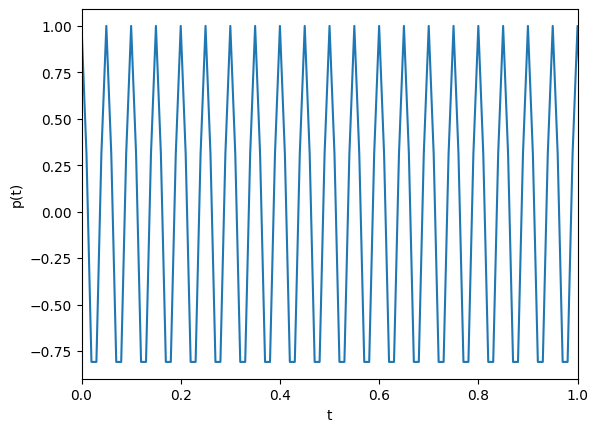

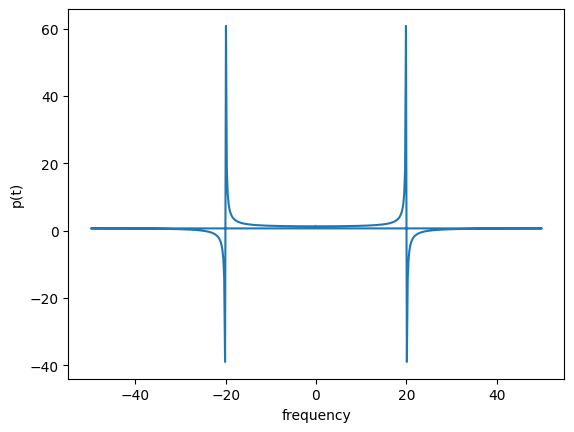

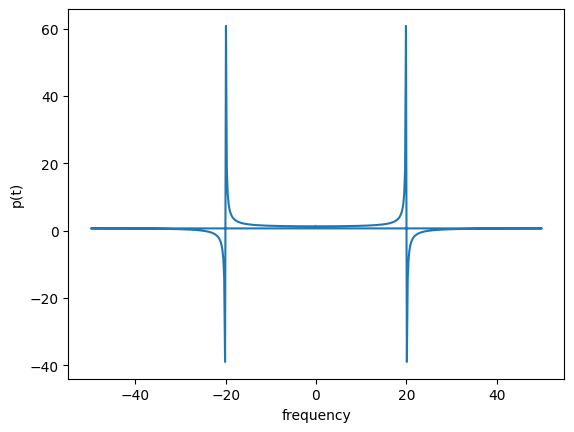

In [8]:
t_vals = np.arange(0,10,0.01)#getting the input values for the function
discrete_list = np.array([np.cos(40*np.pi*t) for t in t_vals])#saving the output of the mathematical function
plt.plot(t_vals, discrete_list)#plotting the mathematical function
plt.xlim(0,1) #limitting the x range
plt.xlabel("t")   #xlabel
plt.ylabel("p(t)")#ylabel
plt.show()


p_list, frequency_list = new_fourier_transform(discrete_list, 0.01)#fourier transforming the output of the mathematical functions
plt.plot(frequency_list, p_list)#plotting the fourier transformed output along with the frequency
plt.xlabel("frequency")#xlabel
plt.ylabel("p(t)")#ylabel
plt.show()

discrete_list2 = truncate_list(discrete_list)#getting the truncated list
p_list2, frequency_list2 = fourier_transform(discrete_list2, 0.01)#fourier transforming the output of the mathematical functions
plt.plot(frequency_list2, p_list2) #plotting the fourier transformed output along with the frequency
plt.xlabel("frequency")#xlabel
plt.ylabel("p(t)")#ylabel
plt.show()


The very first curve here is to check that the mathematical function that we have used gives the correct output., The second curve is plotted using the output from our new fourier transform method and the third curve is from out old fourier transform method. The fact that the second and the third graphs are identical means that out fourier transform method works. 

### Power Spectrum

<font color = blue>
It's  also handy to have a module that works the same way the previous one did, but outputs the power spectrum instead of the Fourier transform.  Create a variation on the module you just wrote that does so.

In [9]:
def power_spectrum(data_points, delta_t): #wrapper function for the power spectrum
    p_list, frequency_list = new_fourier_transform(data_points, delta_t) #getting the fourier transform
    return abs(p_list)**2, frequency_list 

The above function is just a wrapper function that creates gives us the output to plot the power spectrum using our fourier transform.

## Timing of the FFT

<font color = blue>
Create a function that takes as input an integer $N$ and outputs the time required to find the Fourier transform (using the FFT) of the function $p(t) = \cos 40\pi t$ on the interval $[0, 10]$ with $\Delta t = T/N$.  Use this function to create lists whose elements are of the form $[N]$ and $[T_N]$, with $N = 2, 4, 8, 16, 32, \dots, 2^{16}$.  Plot the results, and compare them with the timing of the original discrete Fourier transform code.  

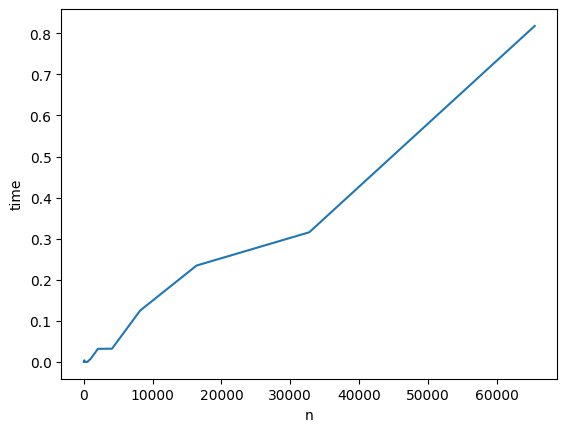

In [10]:
def timing(N): #function examins the time complexity of the algorithm
    delta_t = 10/N #calculating the value of delta t
    t_vals = np.linspace(0,10,int(N)+1)# getting the values  for the mathematical function
    discrete_list = np.array([np.cos(40*np.pi*t) for t in t_vals]) #making the discreet list from the output of the mathematical function
    start_time = time.time() #starting the timer
    p_list, frequency_list = new_fourier_transform(discrete_list, delta_t)#doing the fourier transform
    end_time = time.time() #shutting the timer
    return end_time - start_time #getting the elapsed time
n_vals = [2 ** i for i in range(1, 17)] #making a list of N values
time_vals = np.array([timing(N) for N in n_vals]) #getting the time output for each N val from the timing function
plt.plot(n_vals, time_vals) #plotting
plt.xlabel("n") #xlabel
plt.ylabel("time") # ylabel
plt.show()


Here we know that the time complexity of the algorithm is O(n log n) which is much faster than O($N^2$). O(n log n) visually looks just like linear time.

## Data Analysis: Pulse Periodicity

<font color = blue>
Consider the (artificially created) data set stored on Nexus titled "pulse.csv."  It represents a possible data set of the some signal that pulses at regular intervals.  These pulses are not completely identical, and riding on top of the signal is a significant amount of noise, such that without the tools of Fourier transform it might be impossible to tell that there is any sort of regularity.  With these tools, on the other hand, it is possible to determine with significant accuracy the periodicity of the small, regular signal hiding in all of the noise.

### Original Data

<font color = blue>
Begin by importing in the original data set, converting it to the proper format (it is originally a list of ordered pairs $[t, p]$), and plotting it.  Try various time ranges.  Make an initial guess as to what you think the period of the pulse signal is.  (If it appears to be impossible to tell, don't worry, that's the point.)  

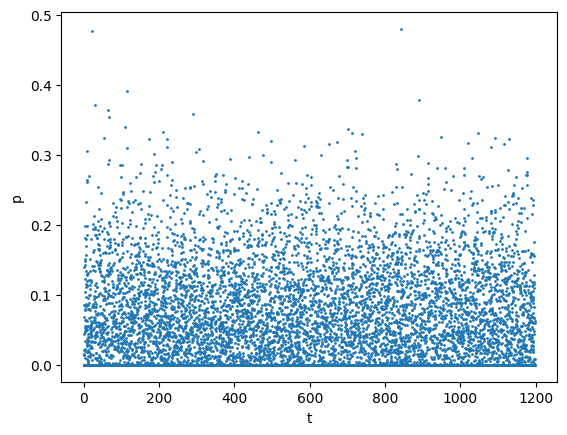

In [11]:
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/pulse.csv') #defining the dataset with its location
plt.scatter(spreadsheet.t, spreadsheet.p,s = 1) #scatter the pair t and p from the 
plt.xlabel("t") #xlabel
plt.ylabel("p") #ylabel
plt.show() 

Here I am simply plotting the given data.

### Pre-Processing the Data

#### Determining the Time Step

<font color = blue>
To perform the analysis, it is necessary to work out what the time step $\Delta t$ of the original data is.  Do so

All I did was open the dataset ans see that the values of t increase uniformly by 0.1. Therefore $\Delta t = 0.1$

#### Subtracting an Offset

<font color = blue>
You should notice that the signal provided is always positive.  If we are thinking of this data as representing oscillations, they are oscilations around some positive offset, rather than around zero.  Why does an offset present a problem for Fourier analysis?  (What would happen if you looked at the Fourier transofrm of a constant?)  Find a way to subtract this offset off of your data, so that it is centered around zero.

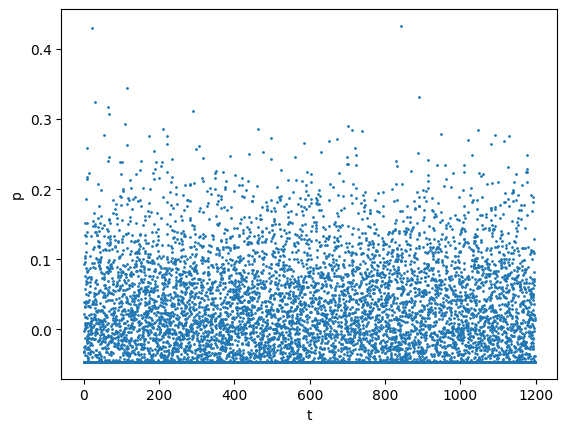

In [12]:
def subtract_offset(pulse_values):
    average = statistics.mean(pulse_values) #getting the average of all values
    new_pulse_values = [value - average for value in pulse_values] #subtracing the average aka offset
    return new_pulse_values 
plt.scatter(spreadsheet.t, subtract_offset(spreadsheet.p),s = 1) # plotting the values without the offset
plt.xlabel("t") #xlabel
plt.ylabel("p") #ylabel
plt.show()

Here I have calculated the mean i.e. the offest of all the data and then subtracted it from each datapoint. I choose the mean here because I know that the wave signal would oscillate around the mean value. 

### * Power Spectrum

<font color = blue>
Now use the function you created earlier to generate the power spectrum of the data.  Plot the results, and use *this* to work out what the period of th pulsing signal was.

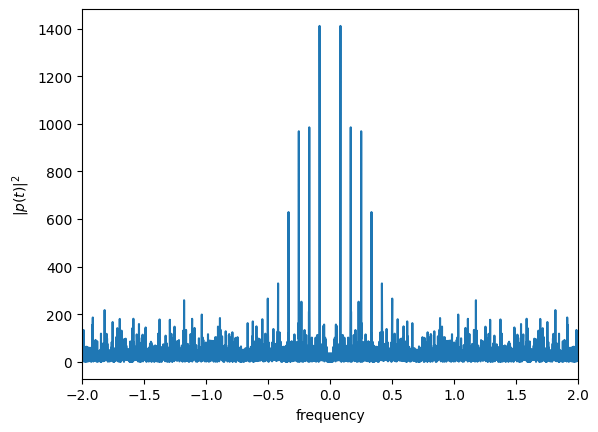

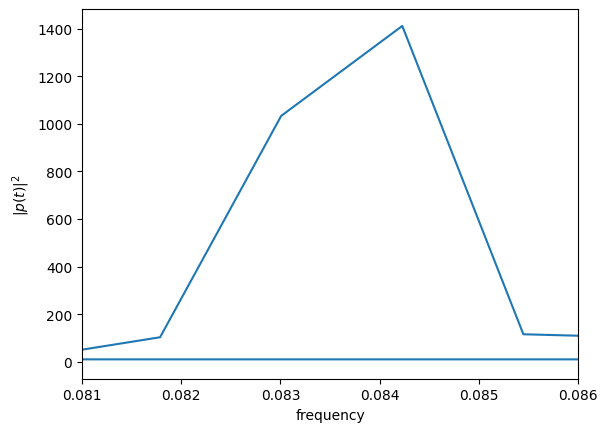

In [13]:
p_list, frequency_list = power_spectrum(subtract_offset(spreadsheet.p), 0.1) #getting the power spectrum after removing the offset
plt.plot(frequency_list, p_list) #plotting the powerspectrum 
plt.xlim(-2, 2) #xrange
plt.xlabel("frequency") #xlabel
plt.ylabel("$|p(t)|^2$")#ylabel
plt.show()

plt.plot(frequency_list, p_list) #plotting the powerspectrum 
plt.xlim(0.081, 0.086) #xrange
plt.xlabel("frequency") #xlabel
plt.ylabel("$|p(t)|^2$")#ylabel
plt.show()

In the first image,. I have plotted the power spectrum which is symmetric around the y axis. In the second plot I have zoomed in on the first peak after x =0. We see the peak at around x = 0.0845 therefore the time period would be 1/0.0845 = 11.8343. 
The cool part about this is that we have used fourier transform to weed out the background data and get back the original signal data. 

## Final Project Work

<font color = blue>
This week, you should submit your progress on your final project, in a separate Python notebook.  Your notebook should be organized the same way these assignments are (broken into sections, code correctly commented, and short discussions after each section.)  Keep in mind that depending on the topic of your project, I may have very little experience with it, which means your discussions need to be that much better!

At the end, include a brief discussion of what you *intended* to accomplish as compared with what you *did* accomplish, as well as a plan of what you intend to do in the following week.